# Import libraries

In [1]:
import numpy as np
from numpy import newaxis
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Activation
from keras import optimizers

from attention import Attention
from keras.models import Sequential
from keras import optimizers

# Load dataset

In [2]:
df = pd.read_csv("./BTC.csv")
df1=df.reset_index()['Price']
df1.head()

0    28456.1
1    28473.7
2    28029.5
3    28350.4
4    27262.2
Name: Price, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# Split the data into training (70%), test (20%) and validate (10%) sets

In [4]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(time_step, 1)),
    Attention(),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 100)          10200     
                                                                 
 attention (Attention)       (None, 128)               35600     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,961
Trainable params: 49,961
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
20/20 [==============================] - 6s 84ms/step - loss: 0.0234 - accuracy: 7.9239e-04 - val_loss: 4.1805e-04 - val_accuracy: 0.0035
Epoch 2/300
20/20 [==============================] - 1s 49ms/step - loss: 0.0017 - accuracy: 7.9239e-04 - val_loss: 0.0013 - val_accuracy: 0.0035
Epoch 3/300
20/20 [==============================] - 1s 49ms/step - loss: 7.6272e-04 - accuracy: 7.9239e-04 - val_loss: 7.1678e-04 - val_accuracy: 0.0035
Epoch 4/300
20/20 [==============================] - 1s 48ms/step - loss: 6.8596e-04 - accuracy: 7.9239e-04 - val_loss: 4.0070e-04 - val_accuracy: 0.0035
Epoch 5/300
20/20 [==============================] - 1s 50ms/step - loss: 6.5422e-04 - accuracy: 7.9239e-04 - val_loss: 6.5020e-04 - val_accuracy: 0.0035
Epoch 6/300
20/20 [==============================] - 1s 54ms/step - loss: 7.5653e-04 - accuracy: 7.9239e-04 - val_loss: 7.0373e-04 - val_accuracy: 0.0035
Epoch 7/300
20/20 [==============================] - 1s 52ms/step - loss: 6.7797e-04 - a

Epoch 54/300
20/20 [==============================] - 1s 55ms/step - loss: 3.3072e-04 - accuracy: 7.9239e-04 - val_loss: 4.3240e-04 - val_accuracy: 0.0035
Epoch 55/300
20/20 [==============================] - 1s 52ms/step - loss: 3.3297e-04 - accuracy: 7.9239e-04 - val_loss: 4.7665e-04 - val_accuracy: 0.0035
Epoch 56/300
20/20 [==============================] - 1s 53ms/step - loss: 3.4515e-04 - accuracy: 7.9239e-04 - val_loss: 4.7090e-04 - val_accuracy: 0.0035
Epoch 57/300
20/20 [==============================] - 1s 56ms/step - loss: 4.0422e-04 - accuracy: 7.9239e-04 - val_loss: 4.3538e-04 - val_accuracy: 0.0035
Epoch 58/300
20/20 [==============================] - 1s 57ms/step - loss: 3.9313e-04 - accuracy: 7.9239e-04 - val_loss: 4.3032e-04 - val_accuracy: 0.0035
Epoch 59/300
20/20 [==============================] - 1s 54ms/step - loss: 3.7796e-04 - accuracy: 7.9239e-04 - val_loss: 4.3357e-04 - val_accuracy: 0.0035
Epoch 60/300
20/20 [==============================] - 1s 52ms/step - l

Epoch 107/300
20/20 [==============================] - 1s 53ms/step - loss: 4.0699e-04 - accuracy: 7.9239e-04 - val_loss: 6.4368e-04 - val_accuracy: 0.0035
Epoch 108/300
20/20 [==============================] - 1s 51ms/step - loss: 3.7134e-04 - accuracy: 7.9239e-04 - val_loss: 6.6823e-04 - val_accuracy: 0.0035
Epoch 109/300
20/20 [==============================] - 1s 51ms/step - loss: 3.7059e-04 - accuracy: 7.9239e-04 - val_loss: 6.1613e-04 - val_accuracy: 0.0035
Epoch 110/300
20/20 [==============================] - 1s 51ms/step - loss: 3.3794e-04 - accuracy: 7.9239e-04 - val_loss: 6.7309e-04 - val_accuracy: 0.0035
Epoch 111/300
20/20 [==============================] - 1s 51ms/step - loss: 3.4535e-04 - accuracy: 7.9239e-04 - val_loss: 6.5583e-04 - val_accuracy: 0.0035
Epoch 112/300
20/20 [==============================] - 1s 50ms/step - loss: 3.3378e-04 - accuracy: 7.9239e-04 - val_loss: 6.7979e-04 - val_accuracy: 0.0035
Epoch 113/300
20/20 [==============================] - 1s 57ms/s

20/20 [==============================] - 1s 53ms/step - loss: 3.5580e-04 - accuracy: 7.9239e-04 - val_loss: 5.4103e-04 - val_accuracy: 0.0035
Epoch 160/300
20/20 [==============================] - 1s 53ms/step - loss: 3.2750e-04 - accuracy: 7.9239e-04 - val_loss: 4.4231e-04 - val_accuracy: 0.0035
Epoch 161/300
20/20 [==============================] - 1s 56ms/step - loss: 3.3724e-04 - accuracy: 7.9239e-04 - val_loss: 5.6988e-04 - val_accuracy: 0.0035
Epoch 162/300
20/20 [==============================] - 1s 54ms/step - loss: 3.2835e-04 - accuracy: 7.9239e-04 - val_loss: 3.2355e-04 - val_accuracy: 0.0035
Epoch 163/300
20/20 [==============================] - 1s 51ms/step - loss: 3.9160e-04 - accuracy: 7.9239e-04 - val_loss: 3.1240e-04 - val_accuracy: 0.0035
Epoch 164/300
20/20 [==============================] - 1s 51ms/step - loss: 3.2192e-04 - accuracy: 7.9239e-04 - val_loss: 3.2471e-04 - val_accuracy: 0.0035
Epoch 165/300
20/20 [==============================] - 1s 55ms/step - loss: 3.

20/20 [==============================] - 1s 53ms/step - loss: 3.6943e-04 - accuracy: 7.9239e-04 - val_loss: 5.4990e-04 - val_accuracy: 0.0035
Epoch 212/300
20/20 [==============================] - 1s 52ms/step - loss: 3.2592e-04 - accuracy: 7.9239e-04 - val_loss: 3.3768e-04 - val_accuracy: 0.0035
Epoch 213/300
20/20 [==============================] - 1s 54ms/step - loss: 2.8251e-04 - accuracy: 7.9239e-04 - val_loss: 3.7845e-04 - val_accuracy: 0.0035
Epoch 214/300
20/20 [==============================] - 1s 53ms/step - loss: 3.1381e-04 - accuracy: 7.9239e-04 - val_loss: 3.6448e-04 - val_accuracy: 0.0035
Epoch 215/300
20/20 [==============================] - 1s 54ms/step - loss: 3.0171e-04 - accuracy: 7.9239e-04 - val_loss: 3.6306e-04 - val_accuracy: 0.0035
Epoch 216/300
20/20 [==============================] - 1s 51ms/step - loss: 2.9151e-04 - accuracy: 7.9239e-04 - val_loss: 3.0898e-04 - val_accuracy: 0.0035
Epoch 217/300
20/20 [==============================] - 1s 52ms/step - loss: 3.

20/20 [==============================] - 1s 47ms/step - loss: 2.4925e-04 - accuracy: 7.9239e-04 - val_loss: 3.2564e-04 - val_accuracy: 0.0035
Epoch 264/300
20/20 [==============================] - 1s 48ms/step - loss: 2.4801e-04 - accuracy: 7.9239e-04 - val_loss: 2.2955e-04 - val_accuracy: 0.0035
Epoch 265/300
20/20 [==============================] - 1s 49ms/step - loss: 2.5341e-04 - accuracy: 7.9239e-04 - val_loss: 2.6919e-04 - val_accuracy: 0.0035
Epoch 266/300
20/20 [==============================] - 1s 51ms/step - loss: 2.4260e-04 - accuracy: 7.9239e-04 - val_loss: 2.5277e-04 - val_accuracy: 0.0035
Epoch 267/300
20/20 [==============================] - 1s 53ms/step - loss: 2.1373e-04 - accuracy: 7.9239e-04 - val_loss: 3.1376e-04 - val_accuracy: 0.0035
Epoch 268/300
20/20 [==============================] - 1s 49ms/step - loss: 2.3033e-04 - accuracy: 7.9239e-04 - val_loss: 2.6080e-04 - val_accuracy: 0.0035
Epoch 269/300
20/20 [==============================] - 1s 49ms/step - loss: 2.

In [10]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

3/3 [==============================] - 0s 13ms/step


In [11]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 12810.011235276208
Testing RMSE: 6296.622009040912


In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=135
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        print("x_input:",x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.07427309 0.07245347 0.07306312 0.05806293 0.05639417 0.05526041
 0.05912671 0.05718578 0.05280937 0.05526196 0.05568032 0.06524965
 0.05971614 0.05593382 0.05769123 0.05637706 0.06066172 0.07350325
 0.07112064 0.07643641 0.081564   0.08271798 0.088463   0.08549873
 0.08829348 0.08839768 0.08379731 0.07733378 0.07225906 0.07870238
 0.07831668 0.07747997 0.092166   0.09189383 0.09799344 0.0860555
 0.0931318  0.09442264 0.10379911 0.11580859 0.12600312 0.12733906
 0.12711822 0.11818187 0.11937629 0.11050215 0.11455352 0.1097432
 0.09885815 0.10071043 0.10795935 0.10284731 0.11266548 0.12457387
 0.12349609 0.1115115  0.12200463 0.10808844 0.10588934 0.09716451
 0.08259045 0.08825615 0.07547839 0.08290772 0.08508815 0.07675834
 0.06790131 0.06955763 0.0576959  0.07766038 0.09350661 0.08809596
 0.09257347 0.10943682 0.10789092 0.12466874 0.13322716 0.12813223
 0.12269826 0.12401865 0.12789584 0.11935607 0.11875886 0.13011359
 0.14977169 0.12988498 0.12467807 0.12385224 0.12649

2 day output [[0.08885337]]
3 day input [0.05806293 0.05639417 0.05526041 0.05912671 0.05718578 0.05280937
 0.05526196 0.05568032 0.06524965 0.05971614 0.05593382 0.05769123
 0.05637706 0.06066172 0.07350325 0.07112064 0.07643641 0.081564
 0.08271798 0.088463   0.08549873 0.08829348 0.08839768 0.08379731
 0.07733378 0.07225906 0.07870238 0.07831668 0.07747997 0.092166
 0.09189383 0.09799344 0.0860555  0.0931318  0.09442264 0.10379911
 0.11580859 0.12600312 0.12733906 0.12711822 0.11818187 0.11937629
 0.11050215 0.11455352 0.1097432  0.09885815 0.10071043 0.10795935
 0.10284731 0.11266548 0.12457387 0.12349609 0.1115115  0.12200463
 0.10808844 0.10588934 0.09716451 0.08259045 0.08825615 0.07547839
 0.08290772 0.08508815 0.07675834 0.06790131 0.06955763 0.0576959
 0.07766038 0.09350661 0.08809596 0.09257347 0.10943682 0.10789092
 0.12466874 0.13322716 0.12813223 0.12269826 0.12401865 0.12789584
 0.11935607 0.11875886 0.13011359 0.14977169 0.12988498 0.12467807
 0.12385224 0.12649146 0.16

6 day output [[0.06991079]]
7 day input [0.05718578 0.05280937 0.05526196 0.05568032 0.06524965 0.05971614
 0.05593382 0.05769123 0.05637706 0.06066172 0.07350325 0.07112064
 0.07643641 0.081564   0.08271798 0.088463   0.08549873 0.08829348
 0.08839768 0.08379731 0.07733378 0.07225906 0.07870238 0.07831668
 0.07747997 0.092166   0.09189383 0.09799344 0.0860555  0.0931318
 0.09442264 0.10379911 0.11580859 0.12600312 0.12733906 0.12711822
 0.11818187 0.11937629 0.11050215 0.11455352 0.1097432  0.09885815
 0.10071043 0.10795935 0.10284731 0.11266548 0.12457387 0.12349609
 0.1115115  0.12200463 0.10808844 0.10588934 0.09716451 0.08259045
 0.08825615 0.07547839 0.08290772 0.08508815 0.07675834 0.06790131
 0.06955763 0.0576959  0.07766038 0.09350661 0.08809596 0.09257347
 0.10943682 0.10789092 0.12466874 0.13322716 0.12813223 0.12269826
 0.12401865 0.12789584 0.11935607 0.11875886 0.13011359 0.14977169
 0.12988498 0.12467807 0.12385224 0.12649146 0.16281385 0.16277807
 0.17206279 0.16575634 

9 day output [[0.05539588]]
10 day input [0.05568032 0.06524965 0.05971614 0.05593382 0.05769123 0.05637706
 0.06066172 0.07350325 0.07112064 0.07643641 0.081564   0.08271798
 0.088463   0.08549873 0.08829348 0.08839768 0.08379731 0.07733378
 0.07225906 0.07870238 0.07831668 0.07747997 0.092166   0.09189383
 0.09799344 0.0860555  0.0931318  0.09442264 0.10379911 0.11580859
 0.12600312 0.12733906 0.12711822 0.11818187 0.11937629 0.11050215
 0.11455352 0.1097432  0.09885815 0.10071043 0.10795935 0.10284731
 0.11266548 0.12457387 0.12349609 0.1115115  0.12200463 0.10808844
 0.10588934 0.09716451 0.08259045 0.08825615 0.07547839 0.08290772
 0.08508815 0.07675834 0.06790131 0.06955763 0.0576959  0.07766038
 0.09350661 0.08809596 0.09257347 0.10943682 0.10789092 0.12466874
 0.13322716 0.12813223 0.12269826 0.12401865 0.12789584 0.11935607
 0.11875886 0.13011359 0.14977169 0.12988498 0.12467807 0.12385224
 0.12649146 0.16281385 0.16277807 0.17206279 0.16575634 0.16029282
 0.18373946 0.1796258

13 day output [[0.06471974]]
14 day input [0.05769123 0.05637706 0.06066172 0.07350325 0.07112064 0.07643641
 0.081564   0.08271798 0.088463   0.08549873 0.08829348 0.08839768
 0.08379731 0.07733378 0.07225906 0.07870238 0.07831668 0.07747997
 0.092166   0.09189383 0.09799344 0.0860555  0.0931318  0.09442264
 0.10379911 0.11580859 0.12600312 0.12733906 0.12711822 0.11818187
 0.11937629 0.11050215 0.11455352 0.1097432  0.09885815 0.10071043
 0.10795935 0.10284731 0.11266548 0.12457387 0.12349609 0.1115115
 0.12200463 0.10808844 0.10588934 0.09716451 0.08259045 0.08825615
 0.07547839 0.08290772 0.08508815 0.07675834 0.06790131 0.06955763
 0.0576959  0.07766038 0.09350661 0.08809596 0.09257347 0.10943682
 0.10789092 0.12466874 0.13322716 0.12813223 0.12269826 0.12401865
 0.12789584 0.11935607 0.11875886 0.13011359 0.14977169 0.12988498
 0.12467807 0.12385224 0.12649146 0.16281385 0.16277807 0.17206279
 0.16575634 0.16029282 0.18373946 0.17962587 0.18270056 0.20217203
 0.21685495 0.2134723

17 day output [[0.07669123]]
18 day input [0.07112064 0.07643641 0.081564   0.08271798 0.088463   0.08549873
 0.08829348 0.08839768 0.08379731 0.07733378 0.07225906 0.07870238
 0.07831668 0.07747997 0.092166   0.09189383 0.09799344 0.0860555
 0.0931318  0.09442264 0.10379911 0.11580859 0.12600312 0.12733906
 0.12711822 0.11818187 0.11937629 0.11050215 0.11455352 0.1097432
 0.09885815 0.10071043 0.10795935 0.10284731 0.11266548 0.12457387
 0.12349609 0.1115115  0.12200463 0.10808844 0.10588934 0.09716451
 0.08259045 0.08825615 0.07547839 0.08290772 0.08508815 0.07675834
 0.06790131 0.06955763 0.0576959  0.07766038 0.09350661 0.08809596
 0.09257347 0.10943682 0.10789092 0.12466874 0.13322716 0.12813223
 0.12269826 0.12401865 0.12789584 0.11935607 0.11875886 0.13011359
 0.14977169 0.12988498 0.12467807 0.12385224 0.12649146 0.16281385
 0.16277807 0.17206279 0.16575634 0.16029282 0.18373946 0.17962587
 0.18270056 0.20217203 0.21685495 0.21347233 0.18587167 0.1855062
 0.1792464  0.15888534 

21 day output [[0.05605995]]
22 day input [0.088463   0.08549873 0.08829348 0.08839768 0.08379731 0.07733378
 0.07225906 0.07870238 0.07831668 0.07747997 0.092166   0.09189383
 0.09799344 0.0860555  0.0931318  0.09442264 0.10379911 0.11580859
 0.12600312 0.12733906 0.12711822 0.11818187 0.11937629 0.11050215
 0.11455352 0.1097432  0.09885815 0.10071043 0.10795935 0.10284731
 0.11266548 0.12457387 0.12349609 0.1115115  0.12200463 0.10808844
 0.10588934 0.09716451 0.08259045 0.08825615 0.07547839 0.08290772
 0.08508815 0.07675834 0.06790131 0.06955763 0.0576959  0.07766038
 0.09350661 0.08809596 0.09257347 0.10943682 0.10789092 0.12466874
 0.13322716 0.12813223 0.12269826 0.12401865 0.12789584 0.11935607
 0.11875886 0.13011359 0.14977169 0.12988498 0.12467807 0.12385224
 0.12649146 0.16281385 0.16277807 0.17206279 0.16575634 0.16029282
 0.18373946 0.17962587 0.18270056 0.20217203 0.21685495 0.21347233
 0.18587167 0.1855062  0.1792464  0.15888534 0.16519179 0.14467987
 0.17362424 0.173719

25 day output [[0.05097688]]
26 day input [0.08379731 0.07733378 0.07225906 0.07870238 0.07831668 0.07747997
 0.092166   0.09189383 0.09799344 0.0860555  0.0931318  0.09442264
 0.10379911 0.11580859 0.12600312 0.12733906 0.12711822 0.11818187
 0.11937629 0.11050215 0.11455352 0.1097432  0.09885815 0.10071043
 0.10795935 0.10284731 0.11266548 0.12457387 0.12349609 0.1115115
 0.12200463 0.10808844 0.10588934 0.09716451 0.08259045 0.08825615
 0.07547839 0.08290772 0.08508815 0.07675834 0.06790131 0.06955763
 0.0576959  0.07766038 0.09350661 0.08809596 0.09257347 0.10943682
 0.10789092 0.12466874 0.13322716 0.12813223 0.12269826 0.12401865
 0.12789584 0.11935607 0.11875886 0.13011359 0.14977169 0.12988498
 0.12467807 0.12385224 0.12649146 0.16281385 0.16277807 0.17206279
 0.16575634 0.16029282 0.18373946 0.17962587 0.18270056 0.20217203
 0.21685495 0.21347233 0.18587167 0.1855062  0.1792464  0.15888534
 0.16519179 0.14467987 0.17362424 0.17371911 0.18954979 0.19483757
 0.16492896 0.1642524

29 day output [[0.06170976]]


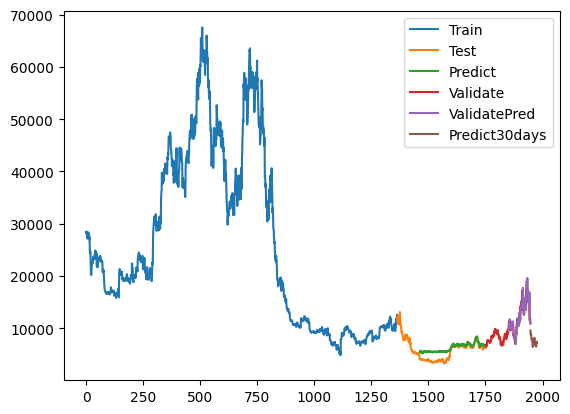

In [14]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()